# Claude Sonnet 3.5 V2 with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.5 V2 with prompt from 2/26/25 v2.

This prompt is built from combining the v2.17 and the v2.26 version to apply stricter rules and instructions on overrule vs not overrule.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v226_v2
MODEL_ID = "anthropic.claude-3-5-sonnet-20241022-v2:0"
SYSTEM_PROMPT = claude_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:root:Completed: 2
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 6
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 12
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed

CPU times: user 1min 8s, sys: 5.04 s, total: 1min 13s
Wall time: 19min 7s


[{'0003.91306_cites_87633.txt': {'model': 'anthropic.claude-3-5-sonnet-20241022-v2:0',
   'input_tokens': 3685,
   'output_tokens': 157,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': "The Acting Case actually reaffirms and repeats the rules established in Murray v. Lardner rather than overruling it. The passage explicitly states that the rules from Murray v. Lardner 'were repeated and reaffirmed.' The Acting Case then builds upon these rules by adding additional context about their application to matured obligations, but does not overrule the original holding.",
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Murray v. Lardner',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Murray v. Lardner",\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The Acting Case actually reaffirms and repeats the rules established in Murray 

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3685,157,no,0.95,The Acting Case actually reaffirms and repeats...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4665,124,no,0.95,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6236,156,yes,0.95,The Combined Opinion explicitly states that 't...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5244,148,no,0.95,While the passage discusses and analyzes Hunti...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5335,140,no,0.95,While the passage discusses Texas v. Hardenber...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/1.claude/1.sonnet3.5v2_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/1.claude/1.sonnet3.5v2_v226_v2_prompt.csv")

In [24]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [25]:
assert len(df) == len(prediction_df)

In [26]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6236,156,yes,0.95,The Combined Opinion explicitly states that 't...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4665,124,no,0.95,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3685,157,no,0.95,The Acting Case actually reaffirms and repeats...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5335,140,no,0.95,While the passage discusses Texas v. Hardenber...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5244,148,no,0.95,While the passage discusses and analyzes Hunti...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [27]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [28]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [29]:
eval_df["prediction"].value_counts()

prediction
no     897
yes    187
Name: count, dtype: int64

In [30]:
eval_df["input_tokens"].sum()

6642443

In [31]:
eval_df["output_tokens"].sum()

168473

In [32]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [33]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.99      0.95      0.97       935
         Yes       0.74      0.93      0.82       149

    accuracy                           0.94      1084
   macro avg       0.86      0.94      0.89      1084
weighted avg       0.95      0.94      0.95      1084



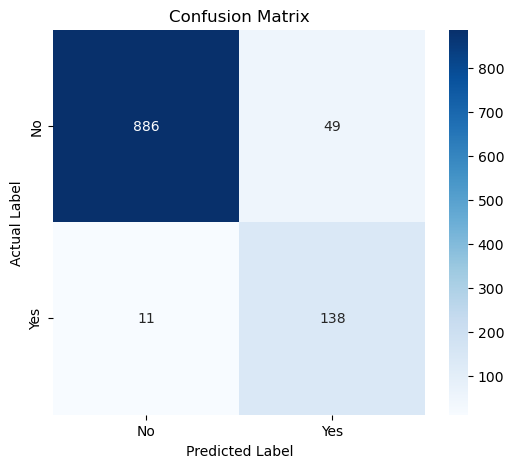

In [34]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [35]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.74
Recall: 0.93
F-score: 0.82
Specificity: 0.95
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 138
True negatives: 886
False positives: 49
False negatives: 11


In [36]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

49

In [37]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

11

# Save the evaluation df

In [38]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6236,156,yes,0.95,The Combined Opinion explicitly states that 't...,Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4665,124,no,0.95,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3685,157,no,0.95,The Acting Case actually reaffirms and repeats...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5335,140,no,0.95,While the passage discusses Texas v. Hardenber...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5244,148,no,0.95,While the passage discusses and analyzes Hunti...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [39]:
eval_df.to_csv("predictions/1.claude/1.sonnet3.5v2_v226_v2_prompt_eval.csv", index=False)